# 使用正-未标记学习的远程监督命名实体识别

命名实体识别（NER）是许多自然语言处理任务的基本组成部分。该领域中现有的监督方法通常需要大量标记数据。在这项工作中，作者探索了仅使用未标记数据和命名实体字典来执行NER的方法。作者将任务表示为正未标记（PU, Positive-Unlabeled）学习问题，并由此提出一种PU学习算法来执行该任务。该方法的一个关键特征是它不需要字典标记句子中的每个实体，甚至不要求字典标记构成实体的所有单词，这大大降低了对字典质量的要求。文章最后对四个公共NER数据集的实验研究，证明了使用PU算法进行学习如同使用完全标记的数据进行监督学习一样，能够无偏差地且一致地估计任务损失。


# 引言

命名实体识别（NER）是一种标记命名实体的方法，例如非结构化文本中的人员，地点，产品和组织名称。它是许多自然语言处理任务的基本组成部分，如机器翻译，知识库构建，自动问答，搜索等。监督方法在该领域取得了巨大成功。然而，这些监督方法通常需要大规模的细粒度标注（标记句子的每个单词），这使得难以将它们应用于标记语料比较少的领域，例如生物/医学领域。

本文定义了一种PU（Positive-Unlabeled）学习算法，Positive代表已标记的实体单词数据，Unlabeled代表其余未标记的数据。此算法仅使用（未标记的数据和命名的实体字典）来执行NER任务。同时使用由AdaSampling算法驱动的适应方法，以丰富字典。最后，在四个NER数据集上进行实验，证明了此算法的有效性。

# 标注机制
因为字典不能够保证包含句子中所有的实体单词，所以本文并没有使用传统的BIO或者BIOES标注模式，而是把标注问题转化为二分类问题进行处理。实体单词被映射到正类，非实体单词被映射到负类。

# 实用词典进行数据标注
作者使用最大匹配算法进行数据标注，具体过程如下：
图 1 伪码
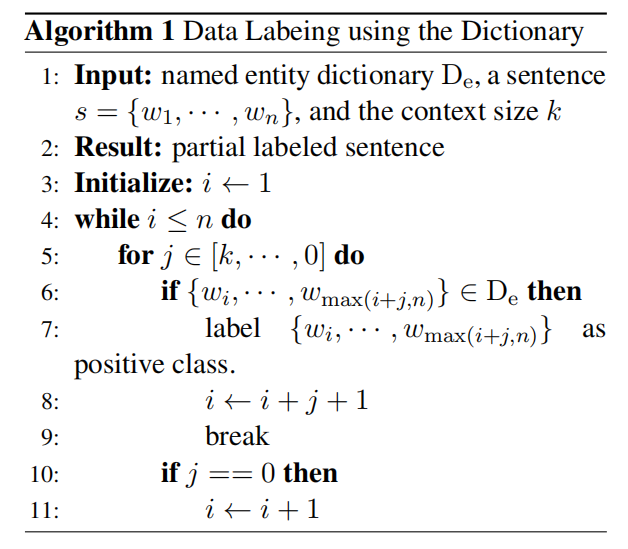

# 建立PU算法分类器
作者使用神经网络结构建立PU算法分类器。
#####词语表示
上下文无关的词语表示包含三部分的特征，分别是字符级别表示ec(w),词级别表示ew(w)和人工设计的特征eh(w)。 作者使用单层卷积神经网络模型对字符嵌入序列进行处理，得到字符序列表示ec(w。之后，作者使用经过微调的GloVe词嵌入表示作为词级别表示ew(w)。最后，作者定义了一个指示符，以消除大小写产生的问题。作者使用allCaps, upperInitial, lowercase, maxedCaps, noinfo五个特征来对指示符进行处理，如果任一特征被激活，则将指示符置为1，否则为0.
作者将这三部分特征串联起来(concatenate)作为词语表示，
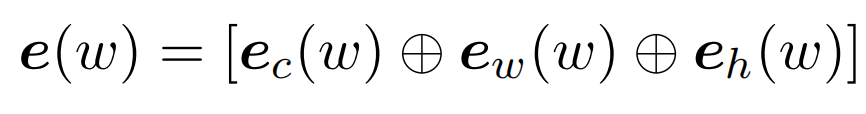
并引入到双向LSTM神经网络模型中，得到
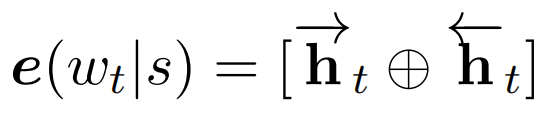


# 标签推理
经过训练的PU分类器可以用来进行标签预测。因为每个实体类型有着不同的分类器，所以同一个实体单词可能被分类为不同的正类。所以作者选取概率最大的正类作为该单词的类别，同时其他类型分类器的预测归零。解决正类冲突之后，作者使用最大匹配的原则对连续实体单词进行分类，得到最终的实体单词标签预测。


# 扩充辞典
在PU学习中，作者使用已标记的正数据经验风险去估计正数据的期望风险。这要求正数据xip与分布P(X|Y=1)相互独立。对于一个很小的字典来说，这个要求很难达到，所以作者使用了AdaSampling的方法进行词典扩充。此方法为不断迭代PU学习算法，并把每一次标注出的结果加入到字典中，直到字典的大小不在变化。


# 结论
本篇文章提出的PU算法使用未标记的数据和命名实体识别字典来执行NER任务，同时使用AdaSampleing的方法扩大了命名实体识别的字典。此方法创新性的使用半监督的学习方式进行NER，虽然相较监督方法，效果还有差距，但是也达到了相对较好效果，为NER在少标记语料领域的执行提供了思路。

* 引用： https://blog.csdn.net/a609640147/article/details/91048682